## Spring 2020 CX4641/CS7641 Homework 2

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Feb 25th, Tuesday, 11:59 pm

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Homework submission ONLY in .ipynb format.


## Instructions for the assignment

In this assignment, we only have writing questions: you are asked to answer them in the markdown cells.

- The Q4 is bonus for both undergraduate and graduate students.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You could directly type the Latex equations in the markdown cell.

- Typing with Latex\markdown is required for all the written questions. Handwritten answers would not be accepted. 
    
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.

## 0 Set up
This notebook is tested under [python 3.6.8](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that has "raise NotImplementedError", and after you finishing the coding, please delete or comment "raise NotImplementedError".

In [4]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm_notebook as tqdm
from sklearn.cluster import KMeans  #for GMM init

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# Load image
import imageio
url = 'https://images.saatchiart.com/saatchi/4169/art/2434526/1504576-7.jpg'

image = imageio.imread(imageio.core.urlopen(url).read())

Version information
python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
matplotlib: 3.1.1
numpy: 1.16.2


## 1. KMeans Clustering [5 + 30 + 10 pts]




KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K sets: $S = \{S_1, S_2, \ldots, S_K\}$ and each set has $\mu_i$ as its center.




### 1.1 pairwise distance [5pts]

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE A FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

In [5]:
def pairwise_dist(x, y):
    """
    Args:
        x: N x D numpy array
        y: M x D numpy array
    Return:
        dist: N x M array, where dist2[i, j] is the euclidean distance between 
        x[i, :] and y[j, :]
    """
    x=x[:, np.newaxis]
    y=y[np.newaxis]
    dist = np.sqrt(np.sum((x - y)**2, axis=2))

    return dist

In [3]:
# TEST CASE
x = np.random.randn(2, 2)
y = np.random.randn(3, 2)

print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]


### 1.2 KMeans Implementation [30pts]

In this section, you are asked to implement the kmeans algorithm. Below is a template which requires you to implement some member functions that haven't been implemented yet.

For the function signature, please see the corresponding doc strings.

In [6]:
def init_centers(points, K, **kwargs):
    """
    Args:
        points: NxD numpy array, where N is # points and D is the dimensionality
        K: number of clusters
        kwargs: any additional arguments you want
    Return:
        centers: K x D numpy array, the centers. 
    """
    centers = points.copy()
    np.random.shuffle(centers)
    return centers[:K]

def update_assignment(centers, points):
    """
    Args:
        centers: KxD numpy array, where K is the number of clusters, and D is the dimension
        points: NxD numpy array, the observations
    Return:
        cluster_idx: numpy array of length N, the cluster assignment for each point
        
    Hint: You could call pairwise_dist() function.
    """
    cluster_idx = np.zeros(points.shape[0])
    dist = pairwise_dist(centers,points)
    cluster_idx = np.argmin(dist, axis=0)
    return cluster_idx

def update_centers(old_centers,overall_rating, cluster_idx, points):
    """
    Args:
        old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
        overall_rating: numpy array of length N x 1, the rating for each point
        cluster_idx: numpy array of length N, the cluster assignment for each point
        points: NxD numpy array, the observations
    Return:
        centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        rating: mean rating of each cluster, K x 1 array, where where K is the number of clusters
    """
    #N,D = points.shape
    K,D = old_centers.shape
    
    new_centers = np.zeros((K, D))
    rating = np.zeros((K,1))
    for k in range(K):
        index = np.where(cluster_idx == k)
        new_centers[k] = np.mean(points[index], axis=0) 
        rating[k] = np.mean(overall_rating[index])
    return new_centers, rating

def get_loss(centers, cluster_idx, points):
    """
    Args:
        centers: KxD numpy array, where K is the number of clusters, and D is the dimension
        cluster_idx: numpy array of length N, the cluster assignment for each point
        points: NxD numpy array, the observations
    Return:
        loss: a single float number, which is the objective function of KMeans. 
    """
    N,D = points.shape
    K = centers.shape[0]
    
    dist = pairwise_dist(centers,points)
    center_clusters = np.zeros((K,N))
    for k in range(K):
        index = np.where(cluster_idx == k)
        center_clusters[k,index] = 1
    #sum of distance between every point and its center
    loss = np.sum(center_clusters*dist)
    return loss

        
def K_means(points, overall_rating, K, max_iters=500, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
    """
    Args:
        points: NxD numpy array, where N is # points and D is the dimensionality
        overall_rating: numpy array of length N x 1, the rating for each point
        K: number of clusters
        max_iters: maximum number of iterations (Hint: You could change it when debugging)
        abs_tol: convergence criteria w.r.t absolute change of loss
        rel_tol: convergence criteria w.r.t relative change of loss
        verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
        kwargs: any additional arguments you want
    Return:
        cluster_idx: Nx1 int numpy array, the cluster assignment for each point
        loss: final loss value of the objective function of KMeans
        highest_rating: The highest rating among the average ratings of final clusters
        winning_center : The center of cluster corresponding to the maximum rating value
    """
    centers = init_centers(points, K)
    for it in range(max_iters):
        cluster_idx = update_assignment(centers, points)
        centers,rating = update_centers(centers, overall_rating, cluster_idx, points)
        loss = get_loss(centers, cluster_idx, points)
        K = centers.shape[0]
        if it:
            diff = np.abs(prev_loss - loss)
            if diff < abs_tol and diff / prev_loss < rel_tol:
                break
        prev_loss = loss
        if verbose:
            print('iter %d, loss: %.4f' % (it, loss))
    highest_rating=np.max(rating)
    winning_center=centers[np.where(rating==highest_rating)[0],:]
    return cluster_idx, loss, winning_center, highest_rating

### 1.3 Candy Clustering

In this section, you will use your K-Means algorithm to do clustering of candies. Imagine that you are the CEO of a candy company. You want to create a new product. However, you are fairly conservative, so you do not want to make a radically new product. Instead, you want to make a product that is similar to other best-selling candies.
The way to do this is simple. You look at all of the candies in the market and cluster them by properties like sweetness, sourness, and nuttiness. You pick one of the centroids of this cluster (the cluster with the absolute best sellers), and that is the candy that you should make.

To help you with this process, we have already done the market research for you. We have provided you with a file called Candy_files.txt. Each row specifies a candy and its properties. For example, the first row of this file is

Nastly Cheese Peanut-Butter Candy Sticks,0.28,0.63,0.68,0.85,1.75
This is six items separated by commas. The items are (in order)

*   The name of the candy. It will almost always have spaces.
*   The candy sweetness. This is a float between 0 and 1 (where 0 = not sweet, 1 = extremely sweet). 
*   The candy sourness. This is a float between 0 and 1 (where 0 = not sour, 1 = extremely sour).
*   The candy nuttiness. This is a float between 0 and 1 (where 0 = no nuts, 1 = all nuts).
*  The candy texture. This is a float between 0 and 1 (where 0 = smooth, 1 = hard and crunchy).
*   The rating. This is a float between 0 and 5 to measure its popularity (e.g the "stars")

You should cluster candies by their their sweetness, sourness and nuttiness attributes (Ignore the texture attribute for this assignment. We want to keep 3 features so that we can visualize our results in 3D). Find the average rating of each cluster and pick the centroid of that cluster as the desired candy you should manufacture.

In [7]:
# helper function for reading the text file. You don't have to modify it

def read_file():#read the .txt file. You only need to change the directory of the open function.
    candies=np.zeros((19000,3))
    overall_rating=np.zeros((19000,1))
    cnt=0
    with open(r'/users/tianxuehu/desktop/7641-HW2/Candy_files.txt', 'r') as f:
    #add the path of the text file "Candy_files.txt" provided to you here
        for line in f:
            name, sweet, sour, nut, texture, rating = line.split(',')
            candies[cnt,:]=[sweet, sour, nut]
            overall_rating[cnt,0]=rating
            cnt+=1
    return candies,overall_rating

In [8]:
# helper function for plotting 3D cluster results. You don't have to modify it

def visualise(X, C, K):#Visualization of clustering. You don't need to change this function   
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=C,cmap='rainbow')
    plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass

The highest rating for k= 5 is 2.7412851405622494
The winning center for k=5 is: sweetness = 0.7239934738955816 , sourness=  0.7860291164658616 nuttyness=  0.19371485943775024


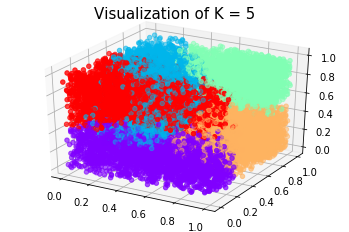

The highest rating for k= 15 is 3.0694645247657295
The winning center for k= 15 is: sweetness = 0.859672021419011 , sourness=  0.7911512717536829 nuttiness=  0.14703480589022744


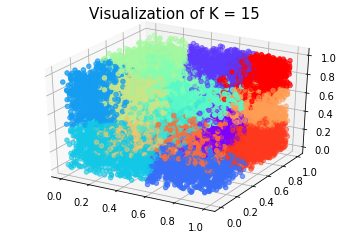

In [9]:
# helper function for running the algorithm for K=5 and K=15. You don't have to modify it

candies,overall_rating= read_file()
#features comprise the sweetness, sourness and nuttiness of the candies which will be the basis of clustering. 
#Overall_rating is the rating of each candy
cluster_idx, loss, winning_center, highest_rating =  K_means(candies, overall_rating, 5)
print ('The highest rating for k= 5 is',highest_rating)
print ('The winning center for k=5 is: sweetness =',winning_center[0,0], ', sourness= ', winning_center[0,1], 'nuttyness= ', winning_center[0,2])
visualise(candies, cluster_idx,5)

cluster_idx, loss, winning_center, highest_rating =  K_means(candies,overall_rating, 15)
print ('The highest rating for k= 15 is',highest_rating)
print ('The winning center for k= 15 is: sweetness =',winning_center[0,0], ', sourness= ', winning_center[0,1], 'nuttiness= ', winning_center[0,2])
visualise(candies, cluster_idx,15)


### 1.4 Find the optimal number of clusters [10 pts]

You will now use the elbow method to find the optimal number of clusters to use for candy clustering.

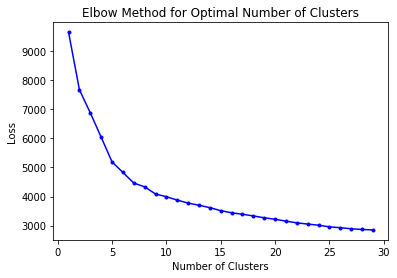

In [12]:
def find_optimal_num_clusters(points, overall_rating, max_K=30):
    """Plots loss values for different number of clusters in K-Means
    Args:
        points: input points of candies
        overall_rating: numpy array of length N x 1, the rating for each point
        max_K: number of clusters
    Return:
        None (plot loss values against number of clusters)
    """  
    loss_list = []
    for k in range(1,max_K):
        cluster_idx, loss, winning_center, highest_rating =  K_means(candies, overall_rating, k)
        loss_list.append(loss)
    K= range(1,max_K)
    plt.plot(K, loss_list, 'b.-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Loss')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.show()

candies,overall_rating= read_file()
find_optimal_num_clusters(candies, overall_rating, 30)

## 2 EM algorithm [20 pts]

### 2.1 Performing EM Algorithm [20 pts for CS 4641; 10 points for CS 7641]

EM algorithm is a widely used approach to learning in the presence of unobserved variables. Consider the general framework of the EM algorithm, given a joint distribution $P(x,z|\theta)$ over observed variables $x$, hidden variable $z$ and its distribution $q(z)$, and governing parameter $\theta$, the goal is to maximize the likelihbood function $P(x|\theta)$ and given the following expression:
    
$$\log P(x|\theta) = \log (\sum_{z}P(x, z|\theta)) = \log (\sum_{z}q(z)\frac{P(x, z|\theta)}{q(z)}) \geq \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)} = \sum_{z}q(z) \log \frac{P(z|x, \theta)P(x|\theta)}{q(z)}$$

The inequality is based on the Jensen's Theorem.

2.1.1. Please provide a brief description on how to perform the $E$ step in the above equation.

2.1.2. Please provide a brief description on how to perform the $M$ step in the above equation.

Suppose

$$F(q,\theta) = \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$$

During the lecture, the expression $\sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$ was explained through the sum of entropy and log-likelihood; the same approach can also be explained using KL-divergence. 

2.1.3. Please derive that from the above equation (**Hint**: use product rule for joint probability) and explain what will happen to the KL term in the $E$ step.

### 2.1 Answer
#### 2.1.1
Initialize the means $\mu_j$, covariances $\Sigma_j$ and misxing coefficients $\pi_j$,
The $E$ step:
$$\tau(z_nk) = \frac{\pi_kN(x_n|\mu_k,\Sigma_k}{\sum_{j=1}{K}\pi_jN(x_n|\mu_j,\Sigma_j)}$$
We know the log likelihood function 
$$L(\theta) >=\sum_{z}q(z) \log \frac{P(z|x, \theta)P(x|\theta)}{q(z)}$$
The goal is to let $L(\theta)$ close to the left hand side of the inequality, and since
$$\sum_{z}q(z) =1,$$
we could write
$$q(z^{(i)}) \propto P(x^{(i)},z^{(i)}|\theta)$$
So
$$q(z^{(i)}) =\frac{P(x^{(i)},z^{(i)}|\theta)}{\sum_{i}P(x^{(i)},z^{(i)}|\theta)} $$
$$ = \frac{P(x^{(i)},z^{(i)}|\theta)}{P(x^{(i)}|\theta)}$$
$$P(z^{(i)}|x^{(i)},\theta)$$

#### 2.1.2
M-step:
$$\theta^(t+1) =  argmax_\theta<L_c(\theta|x,z)>_{q^{t+1}} =  argmax_\theta\sum_{z}P(z|x,\theta)lnP(x,z|\theta)$$
To maximize log likelihood with new settings of $\theta$
$$\theta^{new} = argmax_\theta L(q^{new},\theta^{old})$$
$$ = argmax_\theta \bigg[ \log P(x|\theta) = \log (\sum_{z}P(x, z|\theta)) = \log (\sum_{z}q(z)\frac{P(x, z|\theta)}{q(z)}) \geq \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)} = \sum_{z}q(z) \log \frac{P(z|x, \theta)P(x|\theta)}{q(z)} \bigg]$$
$$ = argmax_\theta\sum_{z}q(z) \log \frac{P(z|x, \theta)P(x|\theta)}{q(z)}$$

#### 2.1.3
$$F(q,\theta) = \sum_{z}q(z) \log \frac{P(x, z|\theta)}{q(z)}$$
$$ = \sum_{z}q(z) \log \frac{P(z|x,\theta)P(x\theta)}{q(z)}$$
$$ = \sum_{z}q(z) \log P(x|\theta) + \sum_{z}q(z) \log \frac{P(z|x,\theta)}{q(z)}$$
$$ = loglikelihood + KL[q(z),P(z|x,\theta)]$$
E-step to max loglikelihood,
$$KL[q(z),P(z|x,\theta)]=0$$
then$$q(z)=P(z|x,\theta)$$



### 2.2 EM Algorithm in Coin Toss problem [10 pts for CS 7641; 10 points Bonus for CS 4641]

Suppose we have a bunch of coins $C$ consisting three kinds of coins. Mathematically, it obeys a mixed Bernoulli distribution:
$$X\sim F = \pi_{1} F_{1}+\pi_{2} F_{2}+(1-\pi_{1}-\pi_{2}) F_{3}$$
where $\pi_{1} \in [0,1]$,$\pi_{2} \in [0,1]$, and $F_{1}=Ber(p_{1})$, $F_{2}=Ber(p_{2})$, $F_{3}=Ber(p_{3})$. That is to say, each coin belongs to $F_{1}$, $F_{2}$ or $F_{3}$. Here $Ber(p)$ means the coin gives 1 (head) with probability $p$ and gives 0 (tail) with probability $1-p$.
We initialized parameters $p_{1}=\frac{1}{2}$, $p_{2}=\frac{4}{5}$, $p_{3}=\frac{1}{4}$, $\pi_{1}=\frac{1}{3}$, $\pi_{2}=\frac{1}{3}$. Now, we draw 3 coins $X_{1}$, $X_{2}$, $X_{3}$ independently from $C$ and have 6 independent trials for each of them. The result shows:

$$
\begin{array}{|c|c|c|c|}\hline Coins & X_{1} & X_{2} & X_{3}   \\ \hline Trial 1 & 0 & 1 & 1   \\ \hline Trial 2 & 0 & 1 & 1   \\ \hline Trial 3 & 1 & 0 & 1   \\  \hline Trial 4 & 0 & 1 & 1   \\ \hline Trial 5 & 1 & 0 & 1   \\ \hline Trial 6 & 1 & 0 & 0   \\\hline\end{array}
$$


2.2.1. Use EM algorithm for one step, we update $F = F(p_{1}=\frac{1}{2},p_{2}=\frac{4}{5},p_{3}=\frac{1}{4},\pi_{1}=\frac{1}{3},\pi_{2}=\frac{1}{3})$ to $F^{'}(p_{1}^{'},p_{2}^{'},p_{3}^{'},\pi_{1}^{'},\pi_{2}^{'})$. Write down your EM algorithm and show the value of $p_{1}^{'},p_{2}^{'},p_{3}^{'},\pi_{1}^{'},\pi_{2}^{'}$. (Round the answer to three decimal places.)

(**Hint**: $\theta^{new}=argmax_{\theta}\sum_{Z}p(Z|X,\theta^{old})\ln p(X,Z|\theta)$)

2.2.2. Using $F^{'}(p_{1}^{'},p_{2}^{'},p_{3}^{'},\pi_{1}^{'},\pi_{2}^{'})$, find the entropy of X. (Round the answer to three decimal places.)









### 2.2 Answer
#### 2.2.1
$$\pi_3 = \frac{1}{3}$$
E-Step:
$$P(X_i \sim F_j) = \frac{\pi_{i} F_{j}}{\pi_{1} F_{j_1}+\pi_{2} F_{j_2}+\pi_3 F_{j_3}}$$
$$P(X_1 \sim F_1) = \frac{\pi_1p_1^3(1-p_1)^3}{\pi_1p_1^3(1-p_1)^3+\pi_2p_2^3(1-p_2)^3+\pi_2p_3^3(1-p_3)^3}=0.59381$$
$$P(X_2 \sim F_1) = \frac{\pi_1p_1^3(1-p_1)^3}{\pi_1p_1^3(1-p_1)^3+\pi_2p_2^3(1-p_2)^3+\pi_2p_3^3(1-p_3)^3}=0.59381$$
$$P(X_3 \sim F_1) = \frac{\pi_1p_1^5(1-p_1)}{\pi_1p_1^5(1-p_1)+\pi_2p_2^5(1-p_2)+\pi_2p_3^5(1-p_3)}=0.19079$$
$$P(X_1 \sim F_2) = \frac{\pi_2p_2^3(1-p_2)^3}{\pi_1p_1^3(1-p_1)^3+\pi_2p_2^3(1-p_2)^3+\pi_2p_3^3(1-p_3)^3}= 0.1566$$
$$P(X_2 \sim F_2) = \frac{\pi_2p_2^3(1-p_2)^3}{\pi_1p_1^3(1-p_1)^3+\pi_2p_2^3(1-p_2)^3+\pi_2p_3^3(1-p_3)^3}= 0.1566$$
$$P(X_3 \sim F_2) = \frac{\pi_2p_2^5(1-p_1)}{\pi_1p_1^5(1-p_1)+\pi_2p_2^5(1-p_2)+\pi_2p_3^5(1-p_3)}=0.80025$$

M-step:
$$\theta^{new}=argmax_{\theta}\sum_{Z}p(Z|X,\theta^{old})\ln p(X,Z|\theta)$$
$$\theta^{new}=argmax_{\theta}\sum_{i}\sum_{j}P(X_i \sim F_j)\ln p(X,Z|\theta)$$
To obtain the new $\theta$, we want to
$$max\sum_{i}\sum_{j}P(X_i \sim F_j)\log (\pi_jp_j^{x_i}(1-p_j)^{6-x_i})$$
$$=max\bigg[P(X_1 \sim F_1)\log(\pi_1p_1^{x_1}(1-p_1)^{6-x_1})+P(X_2 \sim F_1)\log(\pi_1p_1^{x_2}(1-p_1)^{6-x_2})\\ +P(X_3 \sim F_1)\log(\pi_1p_1^{x_3}(1-p_1)^{6-x_3}) + P(X_1 \sim F_2)\log(\pi_2p_2^{x_1}(1-p_2)^{6-x_1})\\ +P(X_2 \sim F_2)\log(\pi_2p_2^{x_2}(1-p_2)^{6-x_2}) +P(X_3 \sim F_2)\log(\pi_2p_2^{x_3}(1-p_2)^{6-x_3})\bigg]$$
(Sorry, not fully understand this part don't know what to do next..)


#### 2.2.2
$$p = \pi_{1}^{'}p_{1}^{'}+\pi_{2}^{'}p_{2}^{'}+\pi_{3}^{'}p_{3}^{'} = $$
$$H = -p\log p - (1-p)\log(1-p)=$$

## 3. GMM implementation [5+5+25 pts]

GMM is trying to do MLE (maximum likelihood estimation). It approximates the distribution of data using a set of gaussian distributions. 

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]$, we are asked to find $K$ diagonal gaussian distributions to model the data $X$: 

\begin{align}
    \max_{\{\mu_k, \sigma_k\}_{k=1}^K} \sum_{i=1}^N \log \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \sigma_k)\big)
\end{align}

- For undergaduate student: you may assume the covariance matrix is diag matrix, which means the features are independent. (i.e. the red intensity of a pixel is independent from its blue intensity, etc). 
- For graduate student: please assume full covariance matrix.

**Hints**

1. Here $\pi(\cdot)$ is the prior of the latent variable. It is also called the mixture coefficient. To make it simple, we assume $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$.

2. As we create our model, we will need to use a multivariate Gaussian since our pixels are 3-dimensional vectors corresponding to red, green, and blue color intensities.  It means that for each image, you need to convert it into a N*3 matrix, where N is the number of pixels, and 3 is the number of features.

The following example from a machine learning textbook may be helpful:

3. In this question, each pixel has three features, which are R, G, and B.

4. At EM steps, gamma means $\tau\left(z_{n k}\right)$ at our slide of GMM, which is called the responsibility. If we have K components, each data point (pixel) will have K responsibility values.

5. For E steps, we already get the log-likelihood at ll_joint() function. For the fomula at our slide:
$$
\tau\left(z_{n k}\right)=\frac{\pi_{k} N\left(x_{n} | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x_{n} | \mu_{j}, \Sigma_{j}\right)},
$$
ll_joint equals to the $N$ here. Thus, You should be able to finish E steps with just a few lines of code by using ll_joint() and softmax() defined above.

## 3.1 Helper functions

### softmax [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $prob \in \mathbb{R}^{N x D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{d=1}^D exp(logit_{i, k})}$.

Note that it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerical stable, you may need to subtract the maximum for each row of $logits$.  As in calculating pairwise distances, DO NOT USE A FOR LOOP.

In [7]:
def softmax(logits):
    """
    Args:
        logits: N x D numpy array
    """
    
    exps = np.exp(logits-np.max(logits,axis=1)[:,np.newaxis])
    #print(logits-np.max(logits,axis=1)[:,np.newaxis])
    return exps / np.sum(exps,axis=1)[:,np.newaxis]
    
logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]""")

print("My answer:")
print(softmax(logits))

Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]
My answer:
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]


### logsumexp [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function.  DO NOT USE A FOR LOOP.

In [8]:
def logsumexp(logits):
    """
    Args:
        logits: N x D numpy array
    Return:
        s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
    """
    max_c = np.max(logits,axis=1)[:,np.newaxis]
    exps = np.exp(logits-max_c)
    s = np.add(np.log(np.sum(exps,axis=1)[:,np.newaxis]),max_c)
    return s


logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]""")

print("My answer: ")
print(logsumexp(logits))

Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]
My answer: 
[[1000.6932   ]
 [   2.3132617]]


## 3.2 GMM Implementations [25pts]



In [65]:
class GMM(object):
    def __init__(self): # No need to implement
        pass
        
    def _init_components(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        """
        pi = np.full((K,1),1/K)
        N, D = points.shape
        #sigma = np.zeros((K,D,D))
        #ratings = np.zeros((N,1))
        #cluster_idx, loss, centers, highest_rating =  K_means(points,ratings, K)
        kk = KMeans(n_clusters=K, random_state=0).fit(points)
        centers = kk.cluster_centers_
        cluster_idx=kk.labels_
        loss = kk.inertia_
        
        mu = centers
        sigma = np.array([np.eye(D)]*K)
        #print("original sigma",sigma.shape)
          
        return pi,mu,sigma
    

    def _ll_joint(self, points, pi, mu, sigma, **kwargs):
        
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint for undergraduate: Assume that each dimension of our multivariate gaussian are independent.  
              This allows you to write treat it as a product of univariate gaussians.
        """
       # print("old", "sigma",sigma.shape, "pi",pi.shape,"mu",mu.shape)
        N, D = points.shape
        K = mu.shape[0]
        
        D=mu.shape[1]
        G1=D*np.log(np.pi*2)
        _,G2=np.linalg.slogdet(sigma)
        diff=points[:,np.newaxis,:]-mu[np.newaxis,:,:]
        inverse_sigma=np.linalg.solve(sigma[np.newaxis,],diff)
        G3=((diff)*inverse_sigma).sum(axis=-1)
        ll = -0.5*(G1+G2+G3)
        
        return ll
                


    def _E_step(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.You will have KxDxD numpy
            array for full covariance matrix case
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        ll = self._ll_joint(points, pi, mu, sigma)
        gamma = softmax(ll)
        #print("gamma",gamma.shape)
        return gamma

    def _M_step(self, points, gamma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian. You will have KxDxD numpy
            array for full covariance matrix case
            
        Hint:  There are formulas in the slide.
        """

        N, D = points.shape
        K = gamma.shape[1]
        Nk = np.sum(gamma, axis =0)
        Nk[Nk==0]=1
        #print("nk",Nk)
        mu = (np.dot(gamma.T,points).T/Nk).T
        pi = Nk/N
        sigma = np.zeros((K,D,D))
        
        for k in range(K): 
            diff = points-mu[k]
            sigma[k] = np.dot(gamma[:,k] * diff.T,diff)/Nk[k]
        #print("new", "sigma",sigma, "pi",pi,"mu",mu)
        return pi, mu, sigma
    

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD or KxDxD numpy array)       
        Hint: You do not need to change it. For each iteration, we process E and M steps, then 
        """        
        pi, mu, sigma = self._init_components(points, K, **kwargs)
#         gaussian_type = kwargs['gaussian'] # general: consider full covariance matrix
#                                            # independent: consider only the diagonal, independant components of Gaussian
        pbar = tqdm(range(max_iters))
        for it in pbar:
            # E-step
            gamma = self._E_step(points, pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(points, gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(points, pi, mu, sigma)
            loss = -np.sum(logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)

In this section, you will use your GMM algorithm to do pixel clustering.

In [66]:
# helper function for plotting images. You don't have to modify it
def cluster_pixels_gmm(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of components
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    gamma, (pi, mu, sigma) = GMM()(flat_img, K=K, max_iters=100)
    cluster_ids = np.argmax(gamma, axis=1)
    centers = mu

    gmm_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    
    return gmm_img

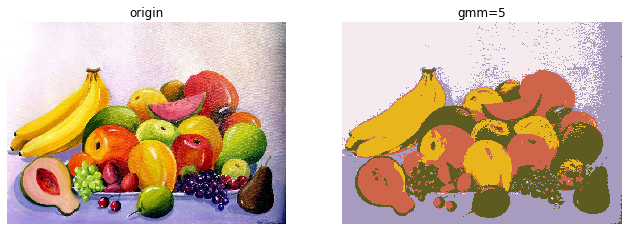

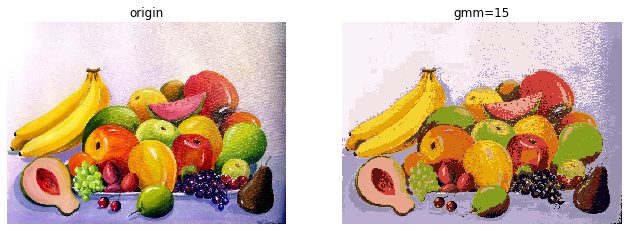

In [67]:
# helper function for plotting images. You don't have to modify it
def plot_images(img_list, title_list, figsize=(11, 6)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')
        
# Generate compressed image with 5 colors
gmm_image_5 = cluster_pixels_gmm(image, 5)
plot_images([image, gmm_image_5], ['origin', 'gmm=5'])

# Generate compressed image with 15 colors
gmm_image_15 = cluster_pixels_gmm(image, 15)
plot_images([image, gmm_image_15], ['origin', 'gmm=15'])

### GMM 5 (sample answer) 
The actual answer might be different depending on covariance matrix type you choose
<img src="https://www.dropbox.com/s/areaoeh1rax0s06/r5.png?raw=1" style="width:500px;height:200px"/>

### GMM 15  (sample answer) 
The actual answer might be different depending on covariance matrix type you choose
<img src="https://www.dropbox.com/s/fgh1imk17uefh1t/r15.png?raw=1" style="width:500px;height:200px"/>

## 4 (Bonus for all) Semi-Supervised Learning [20 pts]

A material scientist wants to improve the safety of composite Lithium-ion batteries by leveraging data obtained from quality control tests. Being a Georgia Tech graduate (very shmart!), the scientist decides to use machine learning for this task.

They order several battery specimens $-$ rated as safe or unsafe for mobile phones $-$ from different manufacturers. The scientist then proceeds to measure the chemical stability, mechanical resistance and charging rate of each specimen.

After characterizing specimens offered by one manufacturer, the scientist realizes that the labels $-$ safe or unsafe $-$ are missing for all other specimens.

The scientist knows that training a classifier on the few labeled data points would likely lead to overfitting. Therefore, they decide to incorporate the remaining unlabeled data to improve the generalization error of the classifier.

Your job is to assist the scientist in implementing a semi-supervised learning framework to perform this task in order to obtain a general classifier.

To help you with this task the scientist shares three datasets:
* Labeled_materials.txt: containing the material characterization data and corresponding labels (safe = 1 and unsafe = 0);
* Unlabeled_materials.txt: containing only the results of the material characterization;
* Independent_materials.txt: a labeled dataset the material scientist obtained from a colleague, which you can use to test your model after training.

Each row corresponds to the results of a test and it is organized as follows:

Chemical stability, mechanical resistance, charging rate, [safe/unsafe]

### 4.1 Getting acquainted with semi-supervised learning approaches. [5pts]

You will implement a version of the algorithm presented in Table 1 of the paper ["Text Classification from Labeled and Unlabeled Documents using EM"](http://www.kamalnigam.com/papers/emcat-mlj99.pdf) by Nigam et al. (2000). While you are recommended to read the whole paper this assignment focuses on items 1$-$5.2 and 6.1. Write a brief summary of three interesting highlights of the paper (50-word maximum).


### Answer
1. The idea of augmentating labeled text with weighted factors fills the white-space of text classification problem. 
2. Introducing “pseudo-counts” (number of occurence) for each word to obtain $\theta$.
3. Manipulated their algorithm so that only one EM performed for each lable, to reduce runtime in leave-one-out cross validation.


### 4.2 Implementing the EM algorithm. [10 pts]
In your implementation of the EM algorithm proposed by Nigam et al. (2000) on Table 1, you will use a Gaussian Naive Bayes (GNB) classifier as opposed to a naive Bayes (NB) classifier. (Hint: Using a GNB in place of an NB will enable you to reuse most of the implementation you developed for GMM in this assignment.)   




In [0]:
class SemiSupervised(object):
    def __init__(self): # No need to implement
        pass
        
    def _init_components(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
            
        Hint: The paper describes how you should initialize your algorithm.
        """
        pi = np.full((K,1),1/K)
        N, D = points.shape
        kk = KMeans(n_clusters=K, random_state=0).fit(points)
        centers = kk.cluster_centers_
        cluster_idx=kk.labels_
        loss = kk.inertia_
        
        mu = centers
        sigma = np.array([np.eye(D)]*K)
        #print("original sigma",sigma.shape)
          
        return pi,mu,sigma

    def _ll_joint(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint: Assume that the three properties of the lithium-ion batteries (multivariate gaussian) are independent.  
              This allows you to treat it as a product of univariate gaussians.
        """
        N, D = points.shape
        K = mu.shape[0]
        
        D=mu.shape[1]
        G1=D*np.log(np.pi*2)
        _,G2=np.linalg.slogdet(sigma)
        diff=points[:,np.newaxis,:]-mu[np.newaxis,:,:]
        inverse_sigma=np.linalg.solve(sigma[np.newaxis,],diff)
        G3=((diff)*inverse_sigma).sum(axis=-1)
        ll = -0.5*(G1+G2+G3)
        
        return ll

    def _E_step(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using _ll_joint() and softmax() defined above. 
        """
        ll = self._ll_joint(points, pi, mu, sigma)
        gamma = softmax(ll)
        return gamma

    def _M_step(self, points, gamma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian. 
            
        Hint:  There are formulas in the slide.
        """
        N, D = points.shape
        K = gamma.shape[1]
        Nk = np.sum(gamma, axis =0)
        Nk[Nk==0]=1
        #print("nk",Nk)
        mu = (np.dot(gamma.T,points).T/Nk).T
        pi = Nk/N
        sigma = np.zeros((K,D,D))
        
        for k in range(K): 
            diff = points-mu[k]
            sigma[k] = np.dot(gamma[:,k] * diff.T,diff)/Nk[k]
        #print("new", "sigma",sigma, "pi",pi,"mu",mu)
        return pi, mu, sigma
    
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD numpy array), mu and sigma.
         
        """        
        raise NotImplementedError

### 4.3 Demonstrating the performance of the algorithm. [5pts]
Compare the classification error based on the Gaussian Naive Bayes (GNB) classifier you implemented following the Nigam et al. (2000) approach to the performance of a GNB classifier trained using only labeled. Since you have not covered supervised learning in class, you are allowed to use the scikit learn library for training the GNB classifier based only on labeled data: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.

In [0]:
# your implementation of the scikit learn GNB goes here